In [1]:
from train import train , evaluate_model
import torch
from model import LivenessModel
from dataloader import CustomImageDataset
from torch.utils.data import DataLoader     
import os

d:\CAKE\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import argparse

def set_args():
    """
    Sets the script's arguments using argparse.

    Instead of parsing command-line arguments,
    we'll manually create an argument namespace with
    the default values. This simulates what would happen
    if the script was run from the command line with no
    additional arguments.
    """
    parser = argparse.ArgumentParser()
    parser.add_argument('--num_train_epochs', default=7, type=int, help='number of train epoched')
    parser.add_argument('--model', default='LivenessModel', type=str, help='model name')
    parser.add_argument('--output_dir', default='/output/', type=str, help='output directory')
    parser.add_argument('--train_batch_size', default=32, type=int, help='batch size in train phase')
    parser.add_argument('--dev_batch_size', default=32, type=int, help='batch size in dev phase')
    parser.add_argument('--projection_dim', default=768, type=int, help='classifier layer hidden size')
    parser.add_argument("--adam_epsilon", default=1e-8, type=float, help="Epsilon for Adam optimizer.")
    parser.add_argument("--optimizer_name", type=str, default='adam',help="use which optimizer to train the model.")
    parser.add_argument('--dropout_rate', default=0.1, type=float, help='dropout rate')
    parser.add_argument('--learning_rate', default=2e-4, type=float, help='learning rate')
    parser.add_argument('--num_classes',default=2,type=int,help='number of classes')
    parser.add_argument('--weight_decay',default=0.05,type=float,help='regularization')
    parser.add_argument('--lora',default=True,type=bool,help='train lora')
    parser.add_argument('--lora_alpha',default=32,type=int,help='lora alpha')
    parser.add_argument('--lora_r',default=64,type=int,help='lora rank')
    parser.add_argument('--pretrained',default=None,type=int,help='load pretrained model')

    args = parser.parse_args(args=[])
    return args

`use_fast` is set to `True` but the image processor class does not have a fast version.  Falling back to the slow version.
Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 7,080,962 || all params: 93,661,442 || trainable%: 7.5602
Accuracy: 0.9535
F1 Score (Macro): 0.9535
Recall (Macro): 0.9535
Precision (Macro): 0.9535


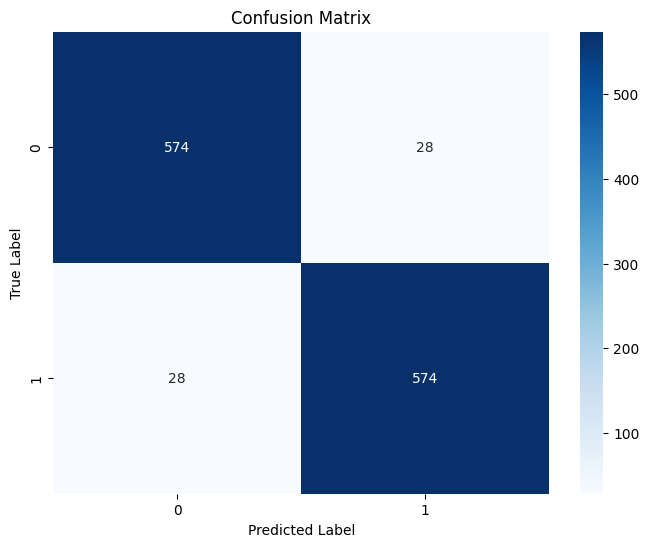

(0.9534883720930233,
 0.9534883720930233,
 0.9534883720930233,
 0.9534883720930233,
 array([[574,  28],
        [ 28, 574]]))

In [ ]:
## Evaluate the model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
args = set_args()
args.pretrained = "facebook/dinov2-base"
data_dir = 'D:/CAKE/dataset'  # Change this to your dataset path
train_dir = os.path.join(data_dir, "train")
dev_dir = os.path.join(data_dir, "dev")
train_dataset = CustomImageDataset(train_dir,modelname=args.pretrained)
dev_dataset = CustomImageDataset(dev_dir,modelname=args.pretrained,dev=True)
args.projection_dim = 1536 
args.lora_r = 128
args.lora_alpha = 64 
model = LivenessModel(args).to(device)
checkpoint=torch.load("D:/CAKE/checkpoint/model_dino_lora.pt",weights_only=True,map_location=torch.device(device))
model.load_state_dict(checkpoint['model_state_dict'])
evaluate_model(model,device=device,testset=dev_dataset,args=args)

Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.8978
F1 Score (Macro): 0.8978
Recall (Macro): 0.8978
Precision (Macro): 0.8980


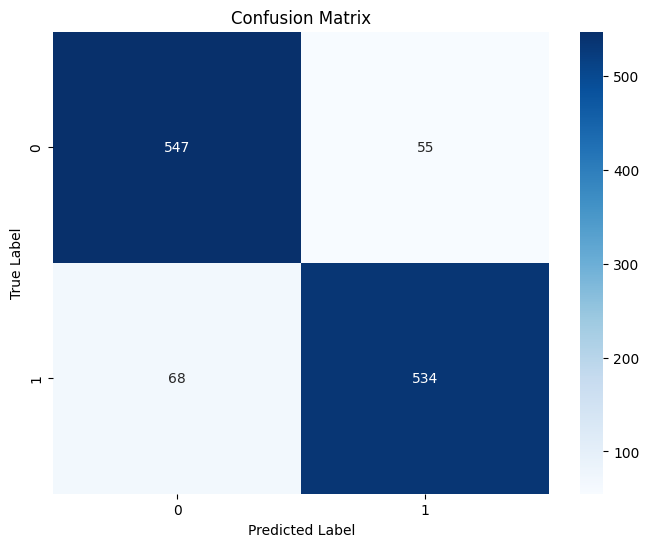

(0.8978405315614618,
 0.8978286201565149,
 0.8978405315614618,
 0.898026143249548,
 array([[547,  55],
        [ 68, 534]]))

In [ ]:
args = set_args()
args.pretrained = "facebook/dinov2-base"
args.projection_dim = 1536
args.lora = False
model_dino_transfer = LivenessModel(args).to(device)
checkpoint=torch.load("D:/CAKE/checkpoint/model_dino_transfer.pt",weights_only=True,map_location=torch.device(device))
model_dino_transfer.load_state_dict(checkpoint['model_state_dict'])
evaluate_model(model_dino_transfer,device=device,testset=dev_dataset,args=args)

trainable params: 4,720,130 || all params: 90,518,786 || trainable%: 5.2145
Accuracy: 0.9460
F1 Score (Macro): 0.9460
Recall (Macro): 0.9460
Precision (Macro): 0.9466


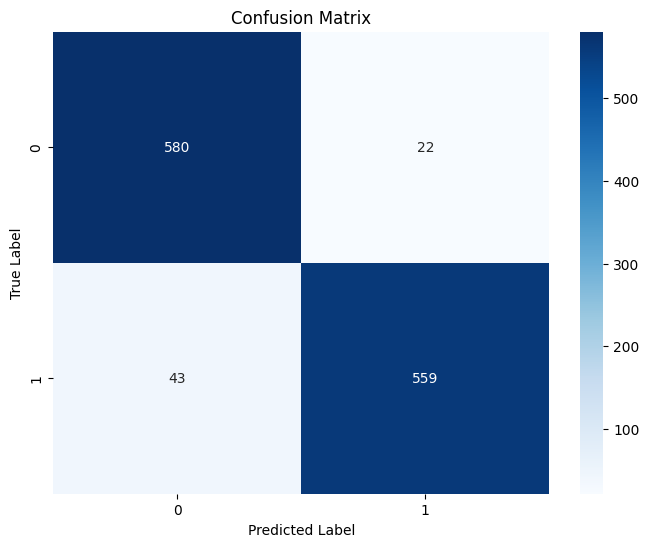

(0.9460132890365448,
 0.9459968602825746,
 0.9460132890365449,
 0.9465566922586011,
 array([[580,  22],
        [ 43, 559]]))

In [ ]:
args = set_args()
args.pretrained = "google/vit-base-patch16-224"
args.projection_dim = 768
args.lora = True
args.lora_r = 32
args.lora_alpha = 16
model_vit_lora = LivenessModel(args).to(device)
dev_dataset = CustomImageDataset(dev_dir,modelname=args.pretrained,dev=True)
train_dataset = CustomImageDataset(train_dir,modelname=args.pretrained)
checkpoint=torch.load("D:/CAKE/checkpoint/model_vit_lora.pt",weights_only=True,map_location=torch.device(device))
model_vit_lora.load_state_dict(checkpoint['model_state_dict'])
evaluate_model(model_vit_lora,device=device,testset=dev_dataset,args=args)

Accuracy: 0.8937
F1 Score (Macro): 0.8937
Recall (Macro): 0.8937
Precision (Macro): 0.8937


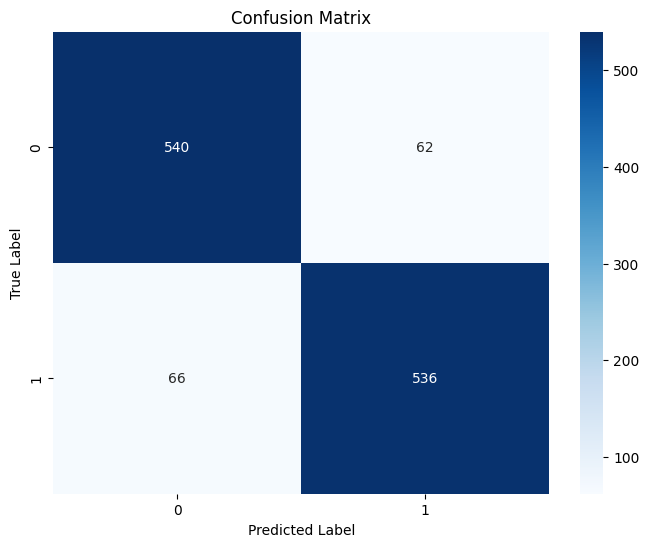

(0.893687707641196,
 0.8936865342163356,
 0.893687707641196,
 0.8937050895725024,
 array([[540,  62],
        [ 66, 536]]))

In [ ]:
args = set_args()
args.pretrained = "google/vit-base-patch16-224"
args.projection_dim = 768
args.lora = False
model_vit_transfer = LivenessModel(args).to(device)
dev_dataset = CustomImageDataset(dev_dir,modelname=args.pretrained,dev=True)
train_dataset = CustomImageDataset(train_dir,modelname=args.pretrained)
checkpoint=torch.load("D:/CAKE/checkpoint/model_vit_transfer.pt",weights_only=True,map_location=torch.device(device))
model_vit_transfer.load_state_dict(checkpoint['model_state_dict'])
evaluate_model(model_vit_transfer,device=device,testset=dev_dataset,args=args)